In [125]:
import torch

torch.manual_seed(0)

In [126]:
n = 10
X = torch.randn(n, 2)

print(X)

tensor([[-1.1258, -1.1524],
        [-0.2506, -0.4339],
        [ 0.5988, -1.5551],
        [-0.3414,  1.8530],
        [ 0.4681, -0.1577],
        [ 1.4437,  0.2660],
        [ 1.3894,  1.5863],
        [ 0.9463, -0.8437],
        [ 0.9318,  1.2590],
        [ 2.0050,  0.0537]])


In [127]:
def func(X):
    x1, x2 = X[:, 0], X[:, 1]
    result = torch.sin(x1) * torch.cos(x2) + torch.sin(0.5 * x1) * torch.cos(0.5 * x2)
    
    return result

y = func(X)

print(y)

tensor([-0.8143, -0.3470,  0.2191, -0.0088,  0.6768,  1.6120,  0.4338,  0.9550,
         0.6094,  1.7484])


In [128]:
def gradient_y(X):
    x1, x2 = X[:, 0], X[:, 1]
    
    df_dx1 = torch.cos(x1) * torch.cos(x2) + 0.5 * torch.cos(0.5 * x1) * torch.cos(0.5 * x2)
    
    df_dx2 = -torch.sin(x1) * torch.sin(x2) - 0.5 * torch.sin(0.5 * x1) * torch.sin(0.5 * x2)
    
    # Intinya untuk membuat gradien ~ (n, 2)    
    return torch.stack([df_dx1, df_dx2], dim=1)

grads = gradient_y(X)

print(grads)

tensor([[ 0.5295, -0.9701],
        [ 1.3635, -0.1177],
        [ 0.3534,  0.6671],
        [ 0.0335,  0.3894],
        [ 1.3662,  0.0800],
        [ 0.4943, -0.3046],
        [ 0.2667, -1.2115],
        [ 0.7947,  0.6994],
        [ 0.5440, -0.8963],
        [-0.1511, -0.0600]])


In [129]:
EPOCH = 1000

LR = 0.001

loss_history = []

weights = torch.randn(2)

print(weights)

tensor([-0.8920, -1.5091])


In [130]:
# loss using MSE
def mse(inp, target):
  diff = inp - target
  return torch.sum(torch.pow(diff, 2)) / diff.numel()

prev_gradient = torch.zeros(2)
momentum = 0.9

def compute_gradient(weights, X, y):
    n = X.shape[0]

    pred = weights @ X.T 

    error = pred - y 

    grad_w = (2 / n) * error @ X  # (1, n) @ (n, 2) -> (1, 2)

    return grad_w

for i in range(EPOCH):
    pred_i = weights @ X.T # Weights (1 x 2), X (n x 2) -> hasil (1 x n)
    loss = mse(pred_i, y)
    
    loss_history.append(loss)
    
    grad_w = compute_gradient(weights, X, y)
        
    with torch.no_grad():
        velocity = momentum * prev_gradient + (1 - momentum) * grad_w
        
        # Weights (1 x n)
        weights -= LR * velocity # Hasil gradient: (n x 2)
        prev_gradient = grad_w
        
    if i % 100 == 0:
        print(f'Epoch {i}, Loss: {loss}')
    

Epoch 0, Loss: 7.556042671203613
Epoch 100, Loss: 4.2276716232299805
Epoch 200, Loss: 2.373648166656494
Epoch 300, Loss: 1.3528940677642822
Epoch 400, Loss: 0.790664553642273
Epoch 500, Loss: 0.480823814868927
Epoch 600, Loss: 0.3099583685398102
Epoch 700, Loss: 0.21565349400043488
Epoch 800, Loss: 0.16354979574680328
Epoch 900, Loss: 0.13472507894039154


Before:
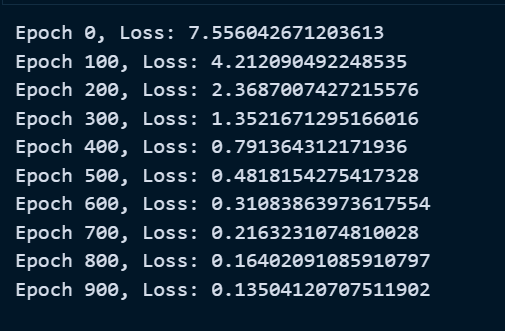

In [ ]:
import numpy as np
from scipy.linalg import svd

"""
Singular Value Decomposition
"""
# define a matrix
X = np.array([[3, 3, 2], [2, 3, -2]])
print(X)
U, singular, V_transpose = svd(X)
print("U: ", U)
print("Singular array", singular)
print("V^{T}", V_transpose)


[[ 3  3  2]
 [ 2  3 -2]]
U:  [[-0.7815437 -0.6238505]
 [-0.6238505  0.7815437]]
Singular array [5.54801894 2.86696457]
V^{T} [[-0.64749817 -0.7599438  -0.05684667]
 [-0.10759258  0.16501062 -0.9804057 ]
 [-0.75443354  0.62869461  0.18860838]]


In [47]:
import torch.nn as nn
import torch
 
m = nn.Conv1d(3, 2, 1)
input = torch.randn(2, 3, 1)
print(input)
output = m(input)

print(output)

tensor([[[ 1.2536],
         [-1.3042],
         [ 0.0137]],

        [[-0.1930],
         [ 0.6011],
         [ 0.1085]]])
tensor([[[-0.2058],
         [-0.7438]],

        [[-0.2300],
         [-0.2706]]], grad_fn=<ConvolutionBackward0>)
